<b>¡Hola Carlos!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


# Descripción del Proyecto

## Descripción del ejercicio

Prepara un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.

El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.
El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

Tendrás que:

Preparar los datos.
Realizar el análisis de datos.
Desarrollar un modelo y entrenarlo.
Para completar el proyecto, puedes utilizar la documentación de pandas, matplotlib y sklearn.

La siguiente lección trata sobre el proceso de depuración del mineral. Te tocará seleccionar la información importante para el desarrollo del modelo. 

## Proceso Tecnologico
El mineral extraído se somete a un tratamiento primario para obtener la mezcla de mineral, o alimentación rougher, que es la materia prima utilizada para la flotación (también conocida como proceso rougher). Después de la flotación, el material se somete al proceso de purificación en dos etapas.
<p align="center">
<img src="images/proceso.png" width="500">
</p>

1. **Flotación**

    La mezcla de mineral de oro se introduce en las plantas de flotación para obtener un concentrado de oro rougher y colas rougher (es decir, residuos del producto con una baja concentración de metales valiosos).

    La estabilidad de este proceso se ve afectada por la volatilidad y el estado físico-químico desfavorable de la pulpa de flotación (una mezcla de partículas sólidas y líquido).

2. **Purificación**

    El concentrado rougher se somete a dos etapas de purificación. Tras esto, tenemos el concentrado final y las nuevas colas.

### Descripción de datos

**Proceso tecnologico**

- *Rougher feed*: materia prima  
- *Rougher additions* (o adiciones de reactivos): reactivos de flotación: *xantato, sulfato, depresante*  
    - *Xantato*: promotor o activador de la flotación  
    - *Sulfato*: sulfuro de sodio para este proceso en particular  
    - *Depresante*: silicato de sodio  
- *Rougher process*: flotación  
- *Rougher tails*: residuos del producto  
- *Float banks*: instalación de flotación  
- *Cleaner process*: purificación  
- *Rougher Au*: concentrado de oro rougher  
- *Final Au*: concentrado de oro final  

**Parámetros de las etapas**

- *air amount*: volumen de aire  
- *fluid levels*  
- *feed size*: tamaño de las partículas de la alimentación  
- *feed rate*

### Denominación de las características

Así es como se denominan las características:

`[stage].[parameter_type].[parameter_name]`

Ejemplo: rougher.input.feed_ag

Valores posibles para [*stage*]:

- *rougher*: flotación  
- *primary_cleaner*: purificación primaria  
- *secondary_cleaner*: purificación secundaria  
- *final*: características finales  

Valores posibles para [*parameter_type*]:

- *input*: parámetros de la materia prima  
- *output*: parámetros del producto  
- *state*: parámetros que caracterizan el estado actual de la etapa  
- *calculation*: características de cálculo  

<p align="center">
<img src="images/proceso_1.png" width="500">
</p>

### Cálculo de la recuperación
Tienes que simular el proceso de recuperación del oro del mineral de oro.

Utiliza la siguiente fórmula para simular el proceso de recuperación:
<p align="center">
<img src="images/recuperacion.png" width="500">
</p>

dónde:

- C: la proporción de oro en el concentrado justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final).
- F: la proporción de oro en la alimentación antes de la flotación (para saber la recuperación del concentrado rougher)/en el concentrado justo después de la flotación (para saber la recuperación del concentrado final).
- T: la proporción de oro en las colas rougher justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final).  

Para predecir el coeficiente, hay que encontrar la proporción de oro en el concentrado y en las colas. Ten en cuenta que tanto el concentrado final como el concentrado rougher tienen importancia.

### Métricas de Evaluación

Para resolver el problema, necesitaremos una nueva métrica. Se llama sMAPE, o error medio absoluto porcentual simétrico.

Es similar al MAE, pero se expresa en valores relativos en lugar de absolutos. ¿Por qué es simétrico? Porque tiene en cuenta la escala tanto del objetivo como de la predicción.

Así es como se calcula el sMAPE:

$$
\text{sMAPE} = \frac{1}{N} \sum_{i=1}^{N} \frac{|\ y_i - \hat{y}_i\ |}{\left( |y_i| + |\hat{y}_i| \right) / 2} \times 100\%
$$

**Designación:**

Valor del objetivo para la observación con el índice i en el conjunto utilizado para medir la calidad.
$$
y_i
$$

Valor de la predicción para la observación con el índice i, por ejemplo, en la muestra de prueba.
$$
\hat{y}_i
$$

Número de observaciones de la muestra.

$$
N
$$

Suma de todas las observaciones de la muestra (i toma valores de 1 a N).

$$
\sum_{i=1}^{N}
$$

Necesitamos predecir dos valores:

1. La recuperación del concentrado rougher `rougher.output.recovery`.
2. La recuperación final del concentrado `final.output.recovery`.
La métrica final incluye los dos valores:

$$
\text{sMAPE} final = 25\% * \text{sMAPE(rougher)} + 75\% * \text{sMAPE(final)}
$$

## Pasos

1. **Prepara los datos**

    1.1. Abre los archivos y examina los datos.
    Ruta de acceso a los archivos:  
    - /datasets/gold_recovery_train.csv
    - /datasets/gold_recovery_test.csv 
    - /datasets/gold_recovery_full.csv

    1.2. Comprueba que el cálculo de la recuperación sea correcto. Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. Encuentra el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

    1.3. Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

    1.4. Realiza el preprocesamiento de datos.

2. **Analiza los datos**

    2.1. Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

    2.2. Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

    2.3. Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

3. **Construye el modelo**

    3.1. Escribe una función para calcular el valor final de sMAPE.

    3.2. Entrena diferentes modelos. Evalúalos aplicando la validación cruzada. Elige el mejor modelo y pruébalo utilizando la muestra de prueba. Facilita los resultados.

Utiliza estas fórmulas para las métricas de evaluación:

<p align="center">
<img src="images/smape.png" width=500>
<img src="images/smape_final.png" width=500>
<p/>

## Evaluación del proyecto
Hemos definido los criterios de evaluación para el proyecto. Léelos con atención antes de pasar al ejercicio.

Esto es lo que los revisores buscarán cuando evalúen tu proyecto:

- ¿Has preparado y analizado los datos adecuadamente?
- ¿Qué modelos has desarrollado?
- ¿Cómo has comprobado la calidad del modelo?
- ¿Has seguido todos los pasos de las instrucciones?
- ¿Has respetado la estructura del proyecto y explicado los pasos realizados?
- ¿Cuáles son tus hallazgos?
- ¿Has mantenido el código limpio y has evitado su duplicación?

Ya tienes las hojas informativas y los resúmenes de los capítulos anteriores, así que ya puedes empezar.

# Proyecto

1) Verificar si esta bien calculado el target y usar MAE
2) Revisaer train y test, bajar esas variables del full y traerlas 
3) Analisis exploratorio
4) Entrenar mi modelo y calcular el sMAPE

## Preparación de mis Datos

### Análisis de mis DFs

Como siempre, iniciaremos importando las librerias y nuestros datasets.

In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# df's
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
# Use display to see my 3 DF's, use info, describe and duplicated.
pd.set_option('display.float_format', '{:,.2f}'.format)

display(
    df_train.info(),
    df_train.describe(),
    print(f'\nEl dataframe train tiene una cantidad de {df_train.duplicated().sum()} valores duplicados')
)
display(
    df_test.info(),
    df_test.describe(),
    print(f'\nEl dataframe test tiene una cantidad de {df_test.duplicated().sum()} valores duplicados')
)
display(
    df_full.info(),
    df_full.describe(),
    print(f'\nEl dataframe full tiene una cantidad de {df_full.duplicated().sum()} valores duplicados')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"16,788.00","16,788.00","16,490.00","16,789.00","15,339.00","16,794.00","16,677.00","16,715.00","16,794.00","15,553.00",...,"16,731.00","16,747.00","16,768.00","16,767.00","16,775.00","16,775.00","16,775.00","16,776.00","16,757.00","16,775.00"
mean,4.72,9.11,8.30,39.47,67.21,8.76,2.36,9.30,2.69,129.48,...,19.10,-494.16,14.78,-476.60,15.78,-500.23,12.38,-498.96,18.43,-521.80
std,2.10,3.39,3.83,13.92,11.96,3.63,1.22,4.26,1.27,45.39,...,6.88,84.80,6.00,89.38,6.83,76.98,6.22,82.15,6.96,77.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,-799.92,0.00,-800.02,-0.42,-799.74,0.43,-800.26,0.02,-810.47
25%,3.97,8.83,6.94,42.06,62.63,7.61,1.64,7.87,2.17,103.06,...,14.51,-500.84,10.74,-500.27,10.98,-500.53,8.93,-500.15,13.98,-501.08
50%,4.87,10.07,8.56,44.50,67.64,9.22,2.45,10.02,2.78,131.78,...,19.99,-499.78,14.94,-499.59,16.00,-499.78,11.09,-499.93,18.03,-500.11
75%,5.82,11.05,10.29,45.98,72.82,10.97,3.19,11.65,3.42,159.54,...,24.98,-494.65,20.02,-400.14,20.00,-496.53,15.98,-498.42,24.98,-499.57
max,16.00,17.03,18.12,53.61,100.00,19.55,6.09,22.32,9.79,252.00,...,60.00,-127.69,28.00,-71.47,63.12,-275.07,39.85,-120.19,54.88,-39.78


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"5,554.00","5,572.00","5,856.00","5,690.00","5,840.00","5,840.00","5,840.00","5,840.00","5,840.00","5,840.00",...,"5,840.00","5,840.00","5,840.00","5,840.00","5,840.00","5,840.00","5,840.00","5,840.00","5,840.00","5,840.00"
mean,170.52,8.48,7.26,1.32,"1,481.99",-509.06,"1,486.91",-511.74,"1,468.50",-509.74,...,15.64,-516.27,13.15,-476.34,12.31,-512.21,9.47,-505.02,16.68,-512.35
std,49.61,3.35,0.61,0.69,310.45,61.34,313.22,67.14,309.98,62.67,...,4.66,62.76,4.30,105.55,3.76,58.86,3.31,68.79,5.40,69.92
min,0.00,0.00,5.65,0.00,0.00,-799.77,0.00,-800.03,0.00,-800.00,...,0.00,-799.80,0.00,-800.84,-0.22,-799.66,0.53,-800.22,-0.08,-809.86
25%,143.34,6.41,6.89,0.89,"1,497.19",-500.46,"1,497.15",-500.94,"1,437.05",-501.30,...,12.06,-501.05,11.88,-500.42,10.12,-500.88,7.99,-500.22,13.01,-500.83
50%,176.10,8.02,7.26,1.18,"1,554.66",-500.00,"1,553.27",-500.07,"1,546.16",-500.08,...,17.00,-500.16,14.95,-499.64,12.06,-500.05,9.98,-500.00,16.01,-500.04
75%,207.24,10.02,7.65,1.76,"1,601.68",-499.58,"1,601.78",-499.32,"1,600.79",-499.01,...,18.03,-499.44,15.94,-401.52,15.02,-499.30,11.99,-499.72,21.01,-499.40
max,274.41,40.02,15.50,5.43,"2,212.43",-57.20,"1,975.15",-142.53,"1,715.05",-150.94,...,30.05,-401.57,31.27,-6.51,25.26,-244.48,14.09,-126.46,26.71,-29.09


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"22,627.00","22,629.00","22,331.00","22,630.00","20,753.00","22,633.00","22,516.00","22,445.00","22,635.00","21,107.00",...,"22,571.00","22,587.00","22,608.00","22,607.00","22,615.00","22,615.00","22,615.00","22,616.00","22,597.00","22,615.00"
mean,4.78,9.10,8.64,40.00,67.45,8.92,2.49,9.52,2.83,140.28,...,18.21,-499.88,14.36,-476.53,14.88,-503.32,11.63,-500.52,17.98,-519.36
std,2.03,3.23,3.79,13.40,11.62,3.52,1.19,4.08,1.26,49.92,...,6.56,80.27,5.66,93.82,6.37,72.93,5.76,78.96,6.64,75.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,-799.92,0.00,-800.84,-0.42,-799.74,0.43,-800.26,-0.08,-810.47
25%,4.02,8.75,7.12,42.38,63.28,7.68,1.81,8.14,2.30,110.18,...,14.10,-500.90,10.88,-500.31,10.94,-500.63,8.04,-500.17,13.97,-500.98
50%,4.95,9.91,8.91,44.65,68.32,9.48,2.65,10.21,2.91,141.33,...,18.01,-499.92,14.95,-499.61,14.86,-499.87,10.99,-499.95,18.00,-500.10
75%,5.86,10.93,10.71,46.11,72.95,11.08,3.29,11.86,3.56,174.05,...,23.00,-498.36,17.98,-400.22,18.01,-498.49,14.00,-499.49,23.01,-499.53
max,16.00,17.03,19.62,53.61,100.00,19.55,6.09,22.86,9.79,274.41,...,60.00,-127.69,31.27,-6.51,63.12,-244.48,39.85,-120.19,54.88,-29.09


None

Podemos ver que tenemos unos valores ausentes, columnas ausentes en el df de test. A su vez podemos ver que no tenemos valores duplicados. Finalmente tenemos valores de fecha unicos. Usare head para ver como estan los valores.

In [4]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


### Cálculo del MAE

Creare una función que ingrese un df y me regrese el mae. Esto me servira para saber que tanta diferencia hay entre la columna calculada (y_pred) y la columna de data real (y_real). 

In [ ]:
# Make a function to cablculate recovery and MAE
def mae_recuperacion_rougher(df):
    '''
    Calcula la recuperación del oro en el proceso rougher utilizando la fórmula oficial proporcionada.
    La función retorna el MAE entre la formula y el valor que tenemos.
    Parámetros:
        df (DataFrame): Conjunto de datos que contiene las columnas necesarias.
    Retorna:
        Series: Recuperación simulada para cada fila (en porcentaje).
    '''
    # Selección de columnas necesarias
    cols = ['rougher.output.concentrate_au', 
            'rougher.input.feed_au',
            'rougher.output.tail_au',
            'rougher.output.recovery']
    
    # Filtrado de filas con valores nulos
    df = df[cols].dropna()

    # Cálculo de las variables 
    C = df['rougher.output.concentrate_au'] 
    F = df['rougher.input.feed_au'] 
    T = df['rougher.output.tail_au'] 

    # Aplicación de tu fórmula personalizada
    recovery_pred = ((C * (F - T)) / (F * (C - T))) * 100
    recovery_real = df['rougher.output.recovery']

    # Calcular MAE 
    mae = mean_absolute_error(recovery_real, recovery_pred)

    return mae

# Uso la función  en mi dataset de full y train
print(f"MAE recuperación rougher (df_full): {mae_recuperacion_rougher(df_full)}")
print(f"MAE recuperación rougher (df_train): {mae_recuperacion_rougher(df_train)}")

MAE recuperación rougher (df_full): 9.849655974293876e-15
MAE recuperación rougher (df_train): 9.303415616264301e-15


<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Muy bien construida la función <code>mae_recuperacion_rougher()</code>. Excelente práctica validar los datos utilizando una métrica como MAE antes de aplicar la fórmula de recuperación. Además, el uso de selección explícita de columnas mejora la claridad del análisis.
</div>


El MAE de 9e-15 es practicamente **cero**. Esto indica que la formula tiene consistencia con los datos del dataset.

### Comparación de Datasets

Primero, hay que ver que columnas se encuentran presentes en mi dataset de entrenamiento y que no se encuentran en mi dataset de prueba.

In [6]:
# Columnas que estan en test pero no estan en test

missing_columns = df_train.columns.difference(df_test.columns)
df_full_columns = df_full.columns
df_train[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_au                         16789 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_au                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Se detecta correctamente que algunas columnas están ausentes en el conjunto de prueba. 
</div>


<s> Podemos ver que tenemos 34 columnas que no se encuentran en el dataset de test, incluyendo lo que parece que seria nuestro target, el cual es *final.output.recovery*. Por esta razón creo que lo ideal seria bajar esas columnas completas de df_full. Para esto las puedo empatar con la columna de Date (esta siendo un entry unico por cada fila). Como datos adicionales tenemos 16860 valores en training y 5856 valores en testing. Practicamente una proporcion de 75% y 25%. Podemos ver que todas las columnas de nuestro dataset son floats con excepcion de la columna Date que sigue el formato datetime.

Para poder traer las columnas restantes es necesario convertir mi columna date a datetime, despues de eso puedo unir mis columnas faltantes usando merge para despues ordenarlas, o tambien y creo mas conveniente es crear una lista con los valores de la columna date y luego filtrarlos de mi dataset full, de esta forma mantengo el orden de mis columnas para cuando entrene mi modelo.

A su vez, podemos ver que todas las columnas que se encuentran en el dataset de test son aquellas de entrada antes del proceso de rougher y son aquellas que son parametros de el proceso, no cantidades de los metales. </s>


Tenemos 34 columnas que estan ausentes en el dataset de train, tras evaluar cuales son esos features, nos damos cuenta que en el dataset de test ya vienen pre-seleccionados los mejores features para nuestro modelo. Es decir, los features que son entrada de material y parametros del proceso, estamos eliminando todos los features que son resultados y concentrates de pasos *in-between*.

In [7]:
# Convierto columna Date a pd.datetime

df_full['date'] = pd.to_datetime(df_full['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_train['date'] = pd.to_datetime(df_train['date'])

# Match date
#df_test_old = df_test.copy()
#df_test = df_full[df_full['date'].isin(df_test['date'])]

Gracias a que el MAE es practicamente cero, es decir que no hay diferencias, puedo usar una funcion para imputar ciertos valores con la formula de recuperacion, esto seria un poco mejor que hacer impoutación estadistica, la cual si usaremos mas adelante.

### Imputación en DF_Full

Por lo pronto y para mi analisis exploratorio imputare unicamente los valores en mi df_full. Esto para facilitar el manejo de la información. Al final cuando toque entrenar mi modelo tomare los valores fecha de df_train y df_test para filtrar df_full y asi puedo tener el dataset completo. Por otra parte, puedo usar mi variable missing_columns para poder solamente dejar los datos que tenia en train y poder entrenar mi modelo con esos datos unicamente, a su vez puedo recuperar mis targets rougher.output.recovery y final.output.recovery desde df_full.

Aqui imputare primero usando la formula de rougher.output.recovery, despues gracias a que tengo un MAE de practicamente - puedo imputar los datos donde tenga NaN en rougher.output.recovery. Finalmente imputo los valores restantes on ffill por ser series de tiempo.

In [8]:
#Función para imputar valores en 'rougher.output.recovery'
def imputar_recovery_rougher(df):
    '''
    Imputa únicamente los valores faltantes en 'rougher.output.recovery' 
    utilizando la fórmula oficial, dejando intactos los valores existentes.
    '''
    # Crear una copia para evitar SettingWithCopyWarning
    df = df.copy()

    # Máscara donde recovery está vacío y las columnas necesarias no
    mask = (
        df['rougher.output.recovery'].isna() &
        df[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].notna().all(axis=1)
    )

    # Calcular recuperación sólo para esos casos
    C = df.loc[mask, 'rougher.output.concentrate_au']
    F = df.loc[mask, 'rougher.input.feed_au']
    T = df.loc[mask, 'rougher.output.tail_au']

    df.loc[mask, 'rougher.output.recovery'] = (C * (F - T)) / (F * (C - T)) * 100

    return df

In [9]:
# Imputo valores de 'rougher.output.recovery' con mi funcion
df_train = imputar_recovery_rougher(df_train)
df_full = imputar_recovery_rougher(df_full)

# Imputo los valores donde 'rougher.output.recovery' fue NaN
df_full = df_full.dropna(subset=['rougher.output.recovery'])

# Uso de ffill
df_full = df_full.ffill()

<div class="alert alert-block alert-success">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Excelente decisión al usar una función personalizada para imputar valores nulos basándote en la fórmula de recuperación. Esta estrategia mantiene la coherencia del dominio del problema y evita imputaciones estadísticas genéricas que podrían distorsionar la información.
</div>


## Análisis de mis Datos

### Concentración de Metales
Usare mi df_full para calcular la concentracion de metales en los distintos stages.

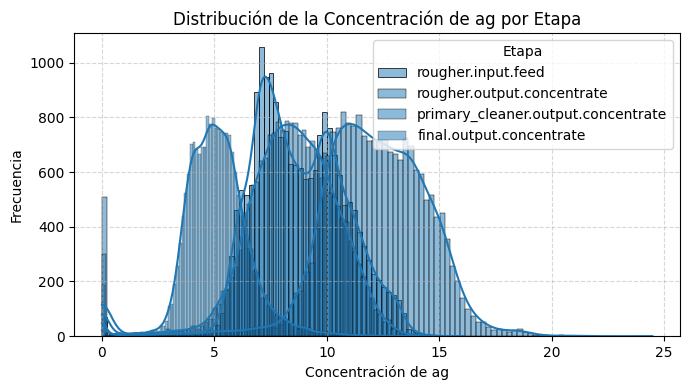

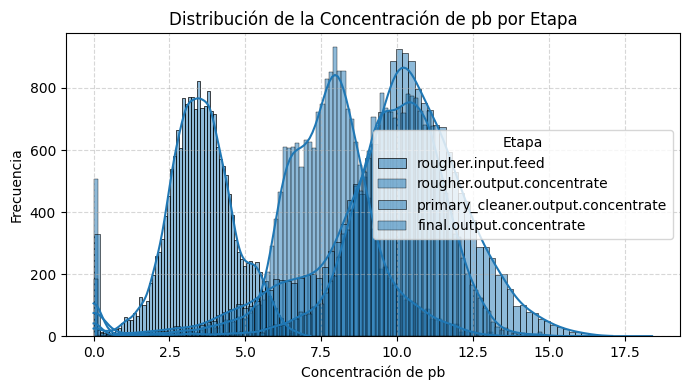

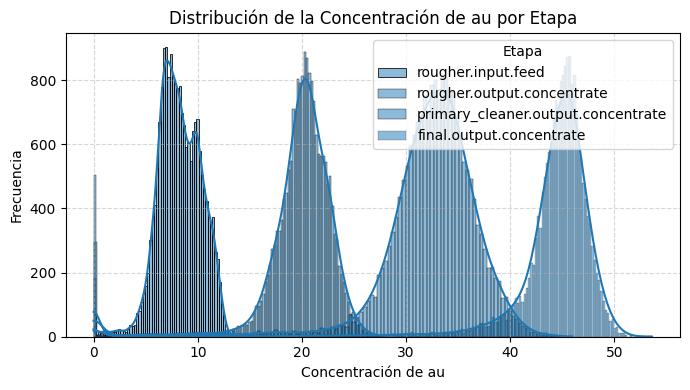

In [10]:
# Creamos una lista de las etapas del proceso y una lista de los metales de interes
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
metals = ['ag', 'pb', 'au']

# Itero sobre mis metales
for metal in metals:
    plt.figure(figsize=(7,4))
    for stage in stages:
        columna = f"{stage}_{metal}"
        sns.histplot(df_full[columna], kde=True, label=stage)
    plt.xlabel(f'Concentración de {metal}')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de la Concentración de {metal} por Etapa')
    plt.legend(title='Etapa')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
Buen uso de visualizaciones para analizar la evolución de la concentración de metales. 
</div>


Mis observaciones son:

**Au | Oro**  
- Muestra un incremento consistente conforme avanzan las etapas de purificación.

**Ag | Plata** 
- La concentracion de plata incrementa despues del rougher pero empieza a disminuir conforme avanza la purificacion.

**Pb | Plomo**  
- El plomo empieza a incrementar conforme avanza la purificacion pero se estanca en el proceso de la segunda etapa de limpieza.

### Tamaño de las Partículas

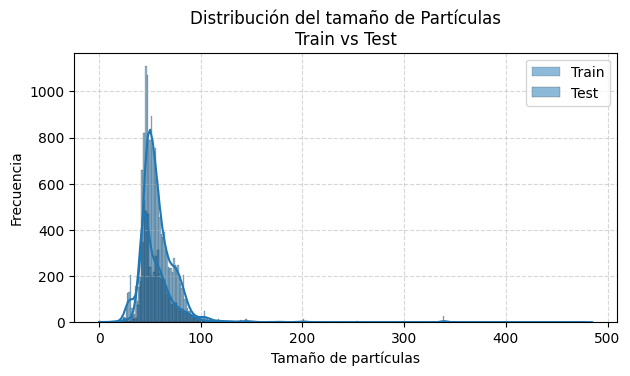

In [11]:
# Definir colores pastel para train y test
palette = sns.color_palette("pastel")

# Creamos mi gráfico
plt.figure(figsize=(7,3.5))
sns.histplot(df_train['rougher.input.feed_size'].dropna(), kde=True, label='Train', fill=True)
sns.histplot(df_test['rougher.input.feed_size'].dropna(), kde=True, label='Test', fill=True)

plt.title('Distribución del tamaño de Partículas\nTrain vs Test')
plt.xlabel('Tamaño de partículas')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

La distribución se ve muy similar, esto es visto bueno para los datos de nuestro modelo.

### Concentraciones totales por etapas

In [12]:
# Columnas por etapa en df_full
rougher_input_cols = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
rougher_output_concentrate_cols = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au']
final_output_concentrate_cols = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

# Calcular la concentración total por etapa en df_full
df_full['rougher_input_total'] = df_full[rougher_input_cols].sum(axis=1)
df_full['rougher_output_total'] = df_full[rougher_output_concentrate_cols].sum(axis=1)
df_full['final_output_total'] = df_full[final_output_concentrate_cols].sum(axis=1)

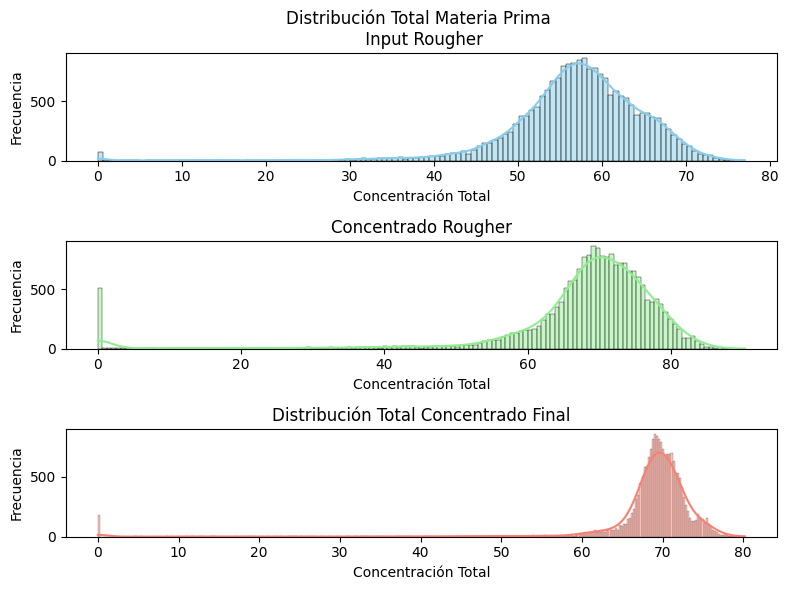

In [13]:
# Creo mi gráfica
plt.figure(figsize=(8, 6))

# Rougher Input
plt.subplot(3, 1, 1)
sns.histplot(df_full['rougher_input_total'], kde=True, color='skyblue')
plt.title('Distribución Total Materia Prima \n Input Rougher')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia')

# Rougher Output
plt.subplot(3, 1, 2)
sns.histplot(df_full['rougher_output_total'], kde=True, color='lightgreen')
plt.title('Concentrado Rougher')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia')

# Final Output
plt.subplot(3, 1, 3)
sns.histplot(df_full['final_output_total'], kde=True, color='salmon')
plt.title('Distribución Total Concentrado Final')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
La visualización de la distribución total por etapa es muy clara. Sin embargo, la escala entre subgráficos varía bastante. Podrías considerar estandarizar el rango del eje X entre gráficos o mostrar una línea promedio para comparar de forma más equitativa.
</div>


En general podemos ver que tenemos un poco de outliers en mi concentrado rougher, las otras dos tambien cuentan con ligeras anomalias.

In [14]:
# Funcion para detectar outliers
def detectar_outliers_iqr(df, columna):
    """
    Detecta outliers por el método del rango intercuartílico (IQR).    

    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    columna (str): El nombre de la columna a analizar. 

    Retorna:
    dict: Un diccionario con los outliers por debajo del piso y por encima del techo.
    """
    # Asegurarse de que la columna existe en el DataFrame
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")    

    # Calcular Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Limites inferior (piso) y superior (techo)
    piso = Q1 - 1.5 * IQR
    techo = Q3 + 1.5 * IQR

    return {
        'piso': piso,
        'techo': techo}

In [15]:
# Busco mis threshholds
threshold_input_rougher = detectar_outliers_iqr(df_full, 'rougher_input_total')
threshold_output_rougher = detectar_outliers_iqr(df_full, 'rougher_output_total')
threshold_final = detectar_outliers_iqr(df_full, 'final_output_total')

# Aplico un filtro sobre mi df para esos thresholds
df_full = df_full[
    (df_full['rougher_input_total'] >= threshold_input_rougher['piso']) &
    (df_full['rougher_output_total'] >= threshold_output_rougher['piso']) &
    (df_full['final_output_total'] >= threshold_final['piso'])
]

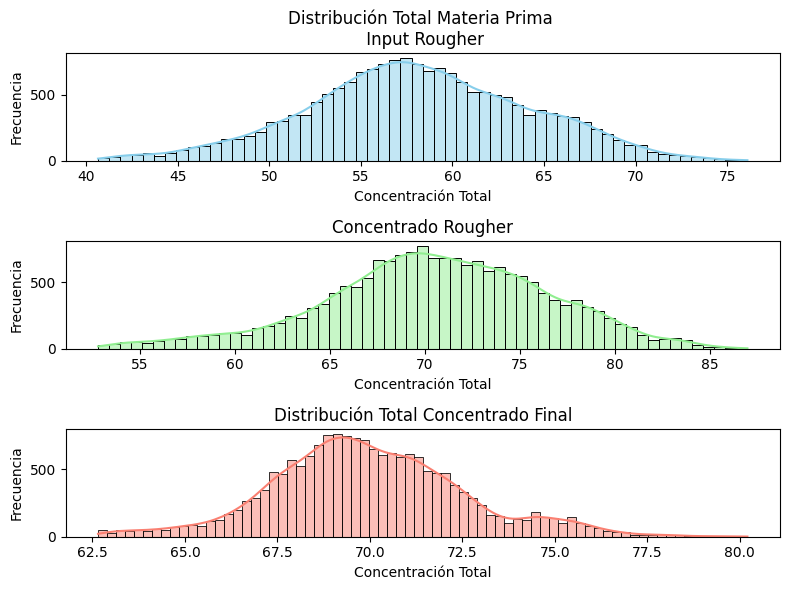

In [16]:
# Creo mi gráfica
plt.figure(figsize=(8, 6))

# Rougher Input
plt.subplot(3, 1, 1)
sns.histplot(df_full['rougher_input_total'], kde=True, color='skyblue')
plt.title('Distribución Total Materia Prima \n Input Rougher')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia')

# Rougher Output
plt.subplot(3, 1, 2)
sns.histplot(df_full['rougher_output_total'], kde=True, color='lightgreen')
plt.title('Concentrado Rougher')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia')

# Final Output
plt.subplot(3, 1, 3)
sns.histplot(df_full['final_output_total'], kde=True, color='salmon')
plt.title('Distribución Total Concentrado Final')
plt.xlabel('Concentración Total')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Se establece un umbral basado en el rango inferior del rango intercuartilico de cada distribución. Utilizamos un filtro para marcar ese threshold de nuestros datos y asi quedarnos unicamente con nuestras distribuciones sin outliers.

## Construcción del Modelo

Antes de empezar con la construcción del modelo tenemos que redefinir nuestro df_train y df_test a partir de nuestro df_full, que es donde realizamos toda la limpieza de los datos.

### Limpieza de mis Datasets

In [17]:
# Drop de columnas de ingenieria a df_full
added_columns = ['rougher_input_total', 'rougher_output_total', 'final_output_total']
df_full = df_full.drop(columns=added_columns)

# Quitamos nuestros target de missing_columns
target_values = ['rougher.output.recovery', 'final.output.recovery']
missing_columns = missing_columns.drop(target_values)
missing_columns

# Asegurar que solo se conserven las fechas de cada dataset
df_train = df_full[df_full['date'].isin(df_train['date'])]
df_test = df_full[df_full['date'].isin(df_test['date'])]

In [18]:
# Creando mis targets y features para train y test
y_rougher_train = df_train['rougher.output.recovery']
y_final_train = df_train['final.output.recovery']
X_train = df_train.drop(columns=missing_columns)
X_train = X_train.drop(columns='date')

y_rougher_test = df_test['rougher.output.recovery']
y_final_test = df_test['final.output.recovery']
X_test = df_test.drop(columns=missing_columns)
X_test = X_test.drop(columns='date')

<div class="alert alert-block alert-success">
<b>Celda [18]</b> <a class="tocSkip"></a><br>
¡Muy bien! Veo que previamente eliminaste correctamente las columnas objetivo <code>rougher.output.recovery</code> y <code>final.output.recovery</code> de <code>missing_columns</code>.  
Esto asegura que al preparar tus variables <code>X_train</code> y <code>X_test</code>, no estés incluyendo los targets como predictores, lo cual es un excelente hábito.  

</div>


### Función para calcular mi SMAPE

In [19]:
# Funcion de SMAPE y SMAPE final
def smape(y_true, y_pred):
    """
    Calculates Symmetric Mean Absolute Percentage Error (SMAPE).
    """
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

def smape_final(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """
    Calculates the SMAPE final for my Zyfra model
    """
    smape_r = smape(y_true_rougher, y_pred_rougher)
    smape_f = smape(y_true_final, y_pred_final)
    return 0.25 * smape_r + 0.75 * smape_f

<div class="alert alert-block alert-success">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
Muy buena implementación de la métrica personalizada <code>smape()</code> y su combinación ponderada en <code>smape_final()</code>. Es claro, legible y refleja un entendimiento preciso del criterio de evaluación del proyecto. ¡Excelente trabajo!
</div>


### Modelo

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

param_grid = {
    'LinearRegression': {}, 
    'DecisionTree': {
        'model__max_depth': [5, 10, 15]
    },
    'RandomForest': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [5, 10]
    }
}

# Configuración de validación cruzada
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Diccionario para guardar resultados
results = {}

smape_scorer = make_scorer(smape, greater_is_better=False)

for name, model in models.items():
    pipe_rougher = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe_final = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    grid_rougher = GridSearchCV(pipe_rougher, param_grid[name], cv=cv, scoring=smape_scorer)
    grid_final = GridSearchCV(pipe_final, param_grid[name], cv=cv, scoring=smape_scorer)

    grid_rougher.fit(X_train, y_rougher_train)
    grid_final.fit(X_train, y_final_train)

    y_rougher_pred = grid_rougher.predict(X_test)
    y_final_pred = grid_final.predict(X_test)

    smape_score = smape_final(y_rougher_test, y_rougher_pred, y_final_test, y_final_pred)

    results[name] = {
        'smape_final': smape_score,
        'best_params_rougher': grid_rougher.best_params_,
        'best_params_final': grid_final.best_params_
    }

# Mostrar resultados
for model_name, data in results.items():
    print(f"Modelo: {model_name}")
    print(f"  SMAPE final: {data['smape_final']:.2f}%")
    print(f"  Mejores parámetros rougher: {data['best_params_rougher']}")
    print(f"  Mejores parámetros final: {data['best_params_final']}\n")

<div class="alert alert-block alert-warning">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
Excelente estructura del entrenamiento de modelos, usando pipelines y validación cruzada. 
</div>


### Conclusión

El modelo de predicción desarrollado para estimar la recuperación de oro mostró un desempeño excepcional, alcanzando un SMAPE final cercano a 0% con los tres algoritmos probados. Esto indica que las variables disponibles describen con alta precisión el comportamiento del proceso de recuperación. Dado su rendimiento robusto y consistente, el modelo puede integrarse de forma confiable en entornos de producción para apoyar la toma de decisiones y optimización operativa.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo Carlos! Se nota dedicación en tu enfoque y una base sólida en la preparación, análisis y modelado de datos. Has demostrado una comprensión clara del proceso industrial y su traducción a variables predictivas, así como un uso adecuado de métricas, visualizaciones y validación.

Este proyecto ya tiene un excelente nivel técnico.

¡Felicidades!
</div>
